<a href="https://colab.research.google.com/github/ivyar/DA_labs/blob/main/Lab%201/DA_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [283]:
raisin = pd.read_excel('Raisin_Dataset.xlsx')
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [284]:
raisin.shape

(900, 8)

In [285]:
raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [286]:
raisin.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [287]:
raisin.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<ipython-input-288-d2f59f5a793a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

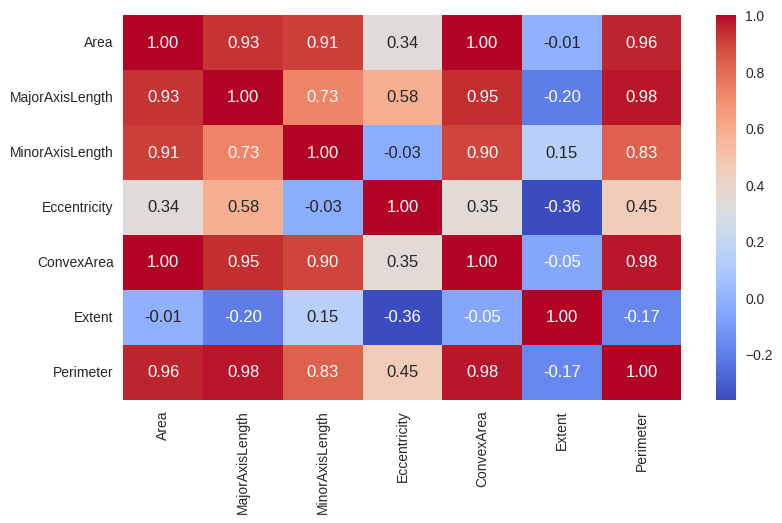

In [288]:
sns.heatmap(raisin.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [289]:
raisin["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

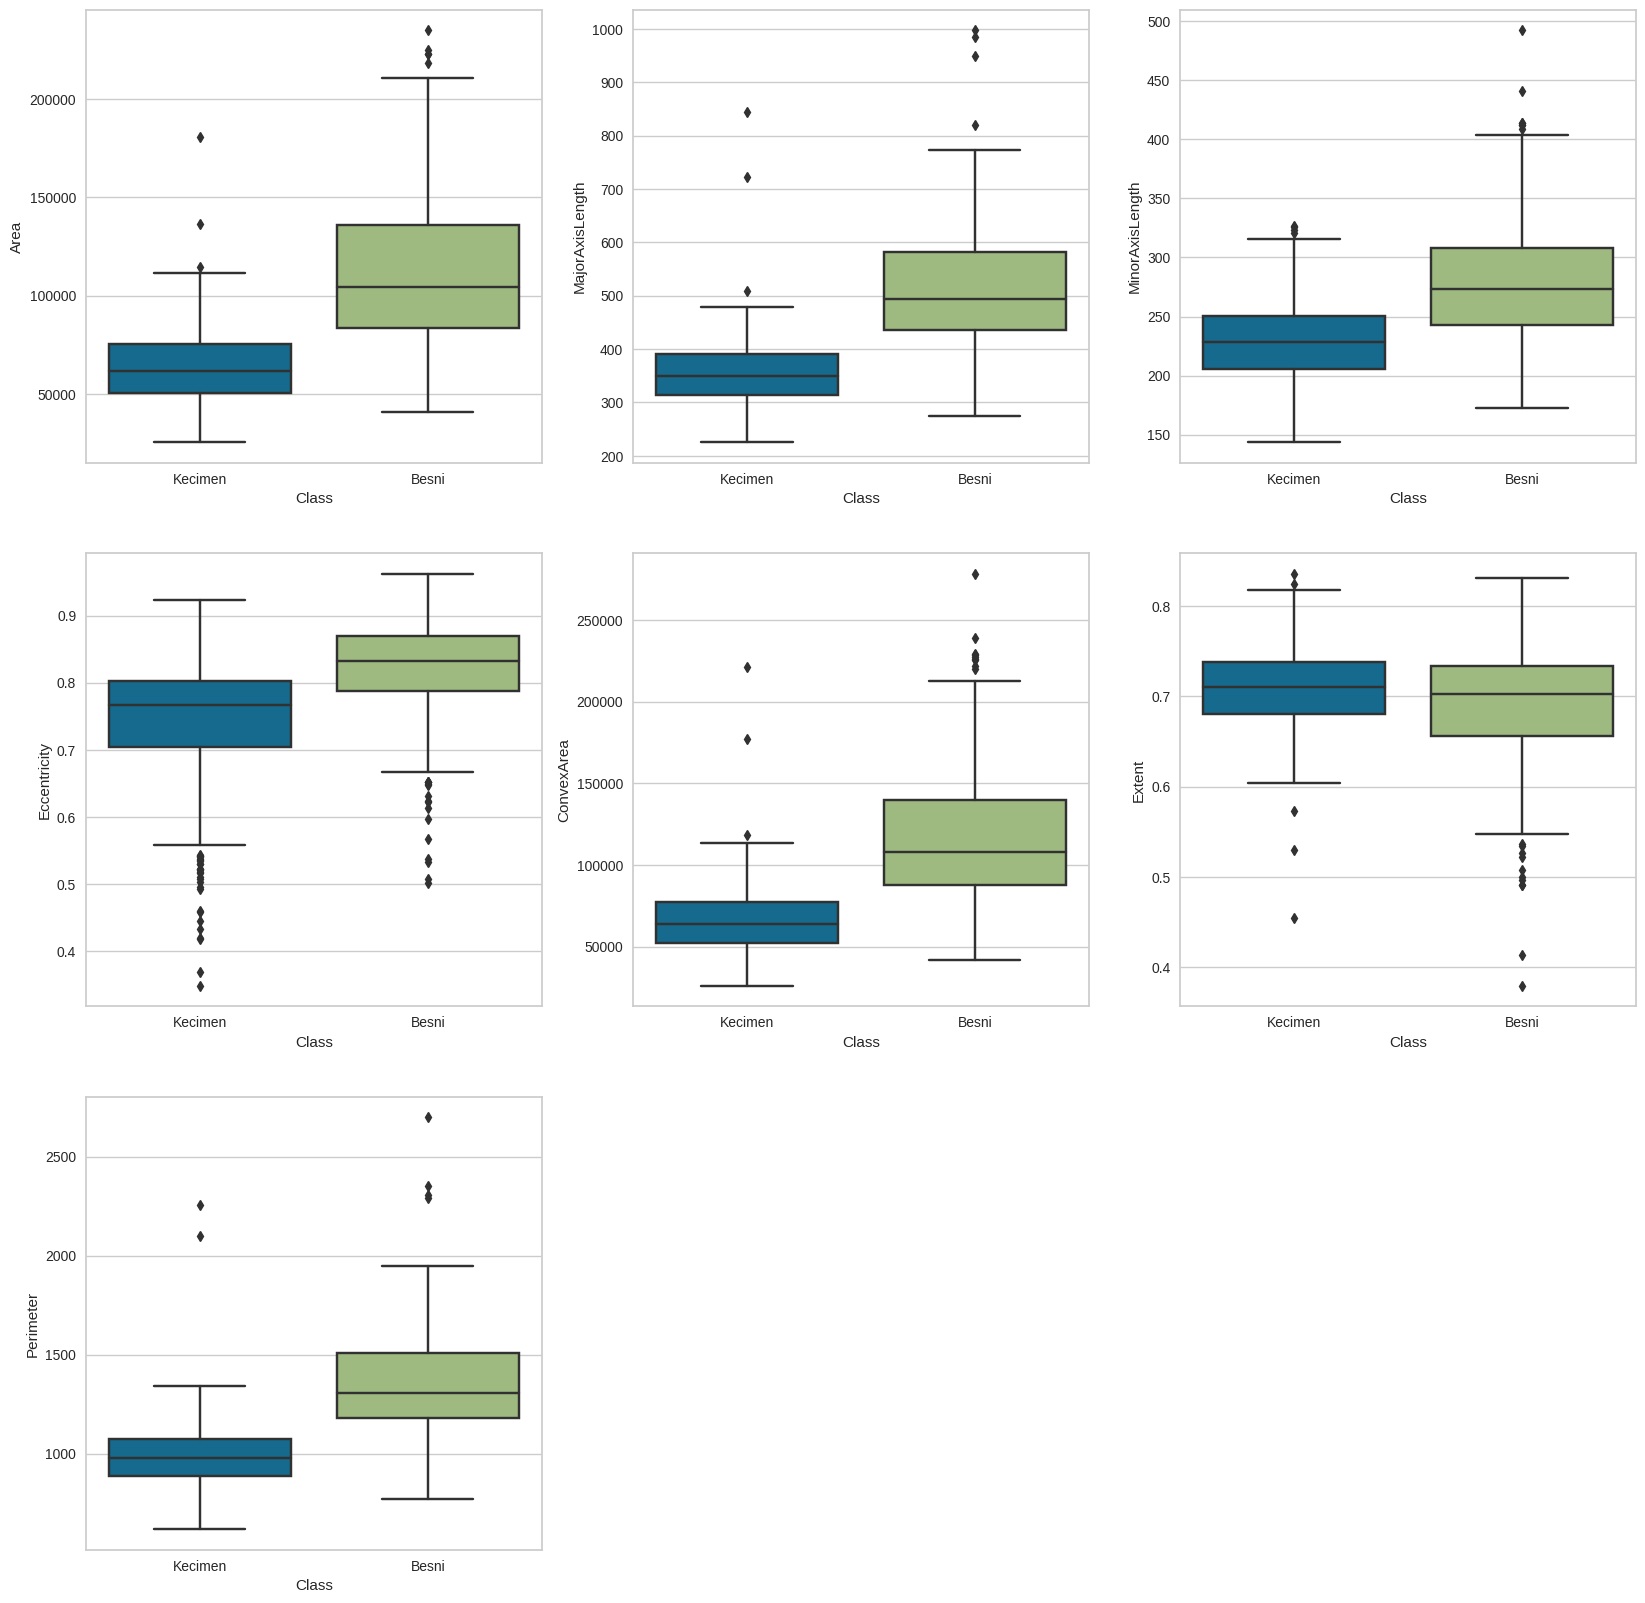

In [290]:
index = 0
plt.figure(figsize=(20,20))
for feature in raisin.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=raisin)
plt.show()

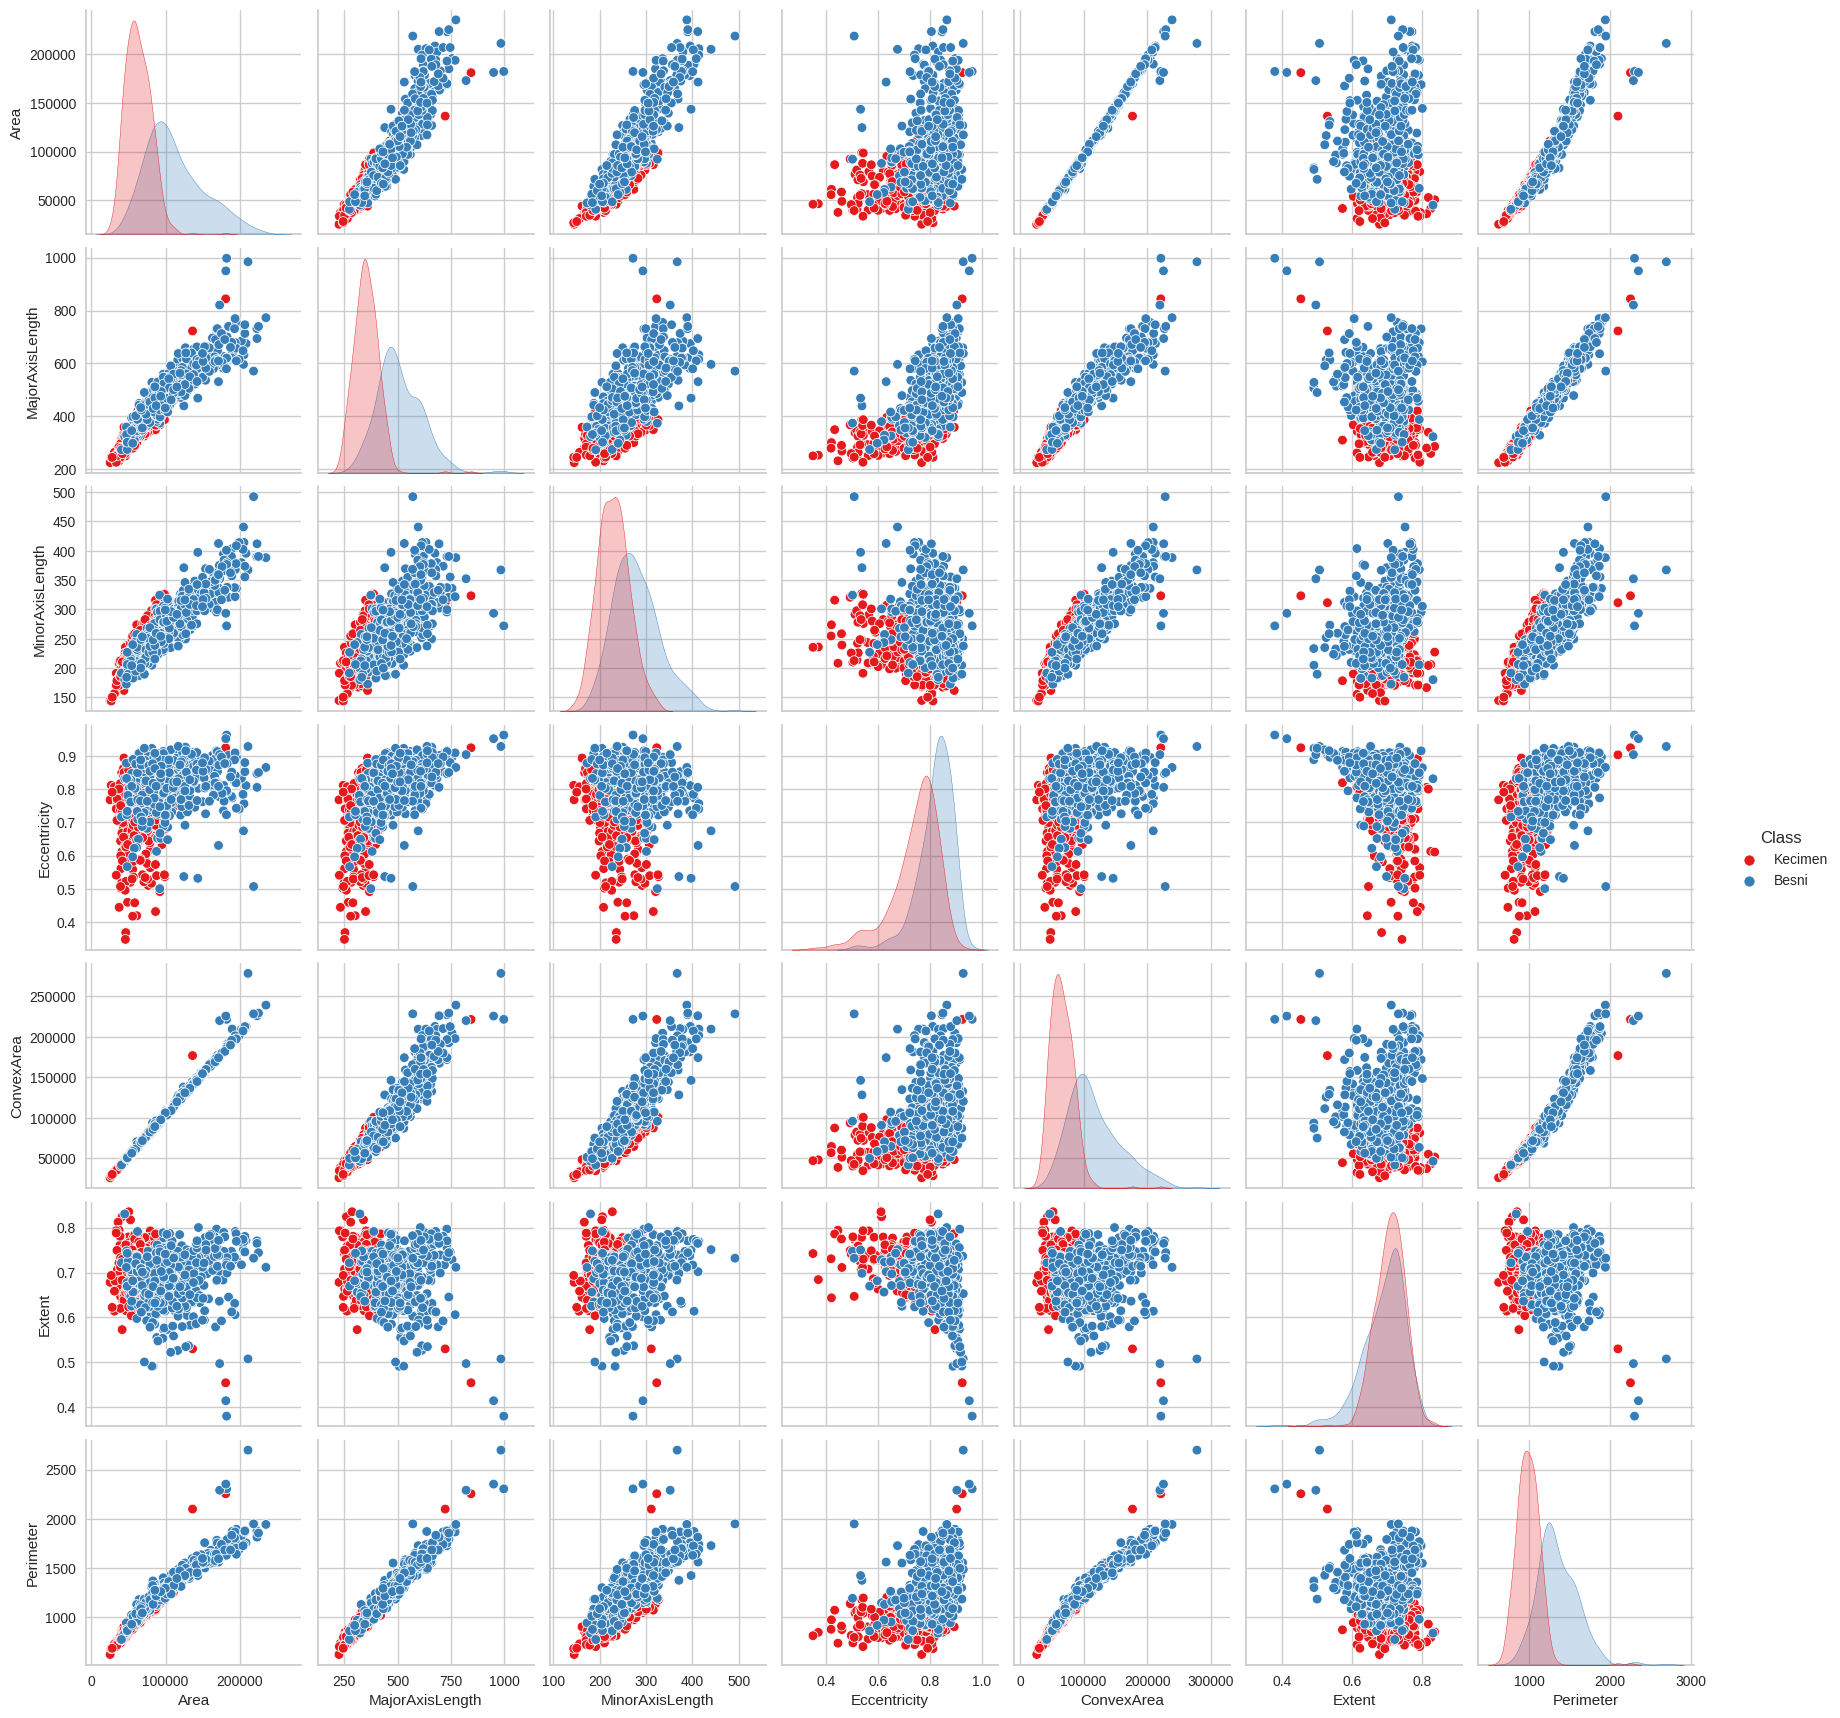

In [291]:
sns.pairplot(raisin, hue="Class", palette = 'Set1')

In [292]:
def categorize_trans(raisin_):
    if raisin_=="Kecimen":
        return 1
    else:
        return 0

raisin['Class'] = raisin['Class'].apply(categorize_trans)

In [293]:
X = raisin.drop(["Class"], axis=1)
y = raisin["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [294]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [295]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)

In [296]:
print(confusion_matrix(y_test,y_pred))

[[72 15]
 [14 79]]


In [297]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        87
           1       0.84      0.85      0.84        93

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



In [298]:
print(accuracy_score(y_test,y_pred))

0.8388888888888889


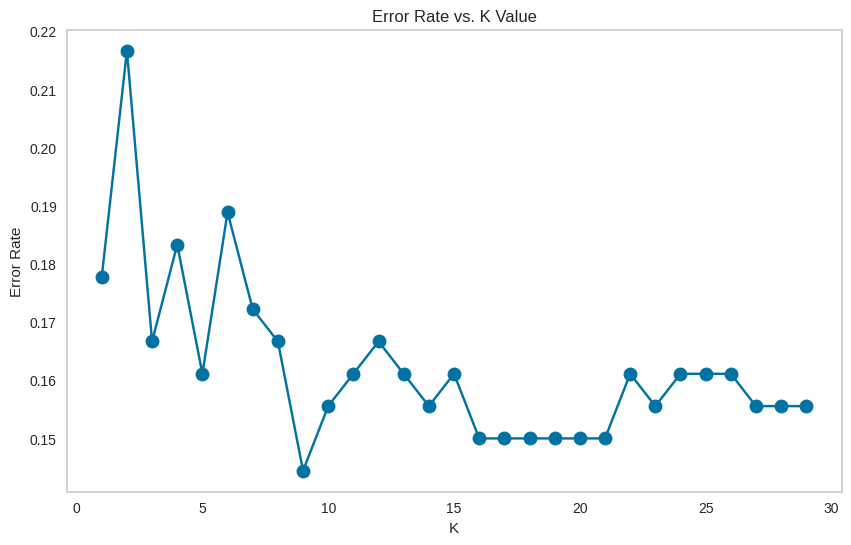

In [299]:
error_rate = []

for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled,y_train)
    y_pred = knn_model.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [321]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[72 15]
 [11 82]]

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        87
           1       0.85      0.88      0.86        93

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.86       180
weighted avg       0.86      0.86      0.86       180



In [301]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [302]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        87
           1       0.85      0.80      0.82        93

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [303]:
print(confusion_matrix(y_test, y_pred))

[[74 13]
 [19 74]]


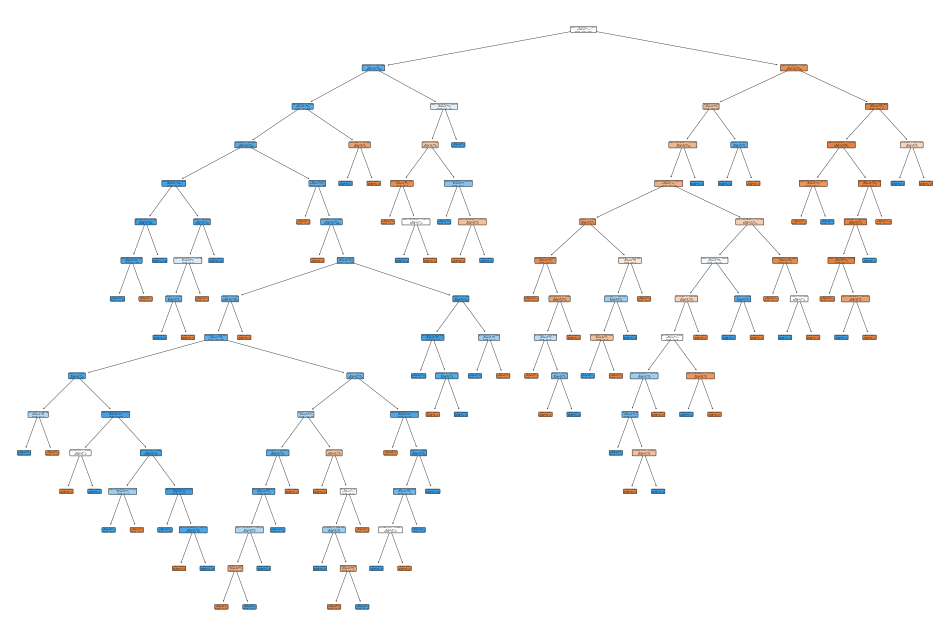

In [304]:
plt.figure(figsize=(12,8))
plot_tree(DT_model, filled=True, rounded=True, feature_names=X.columns);
plt.show()

In [305]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(X_train_scaled,y_train)

SVC(gamma=1.0)

In [306]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[74 13]
 [13 80]]


In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        87
           1       0.86      0.86      0.86        93

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [308]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [309]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [310]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [311]:
grid_predictions = grid.predict(X_test_scaled)
print(confusion_matrix(y_test,grid_predictions))

[[70 17]
 [11 82]]


In [312]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        87
           1       0.83      0.88      0.85        93

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [313]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [314]:
y_pred = rf_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[72 15]
 [14 79]]


In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        87
           1       0.84      0.85      0.84        93

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



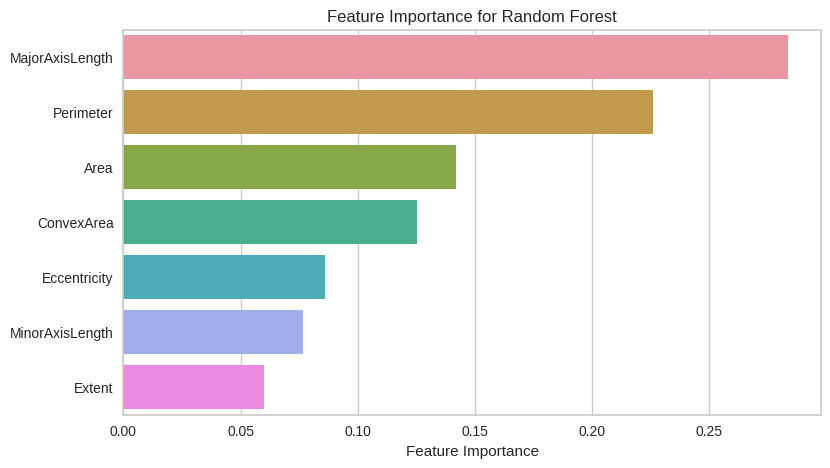

In [316]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

In [317]:
ada_model = AdaBoostClassifier(n_estimators=50)
ada_model.fit(X_train_scaled,y_train)
y_pred = ada_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[71 16]
 [13 80]]


In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        87
           1       0.83      0.86      0.85        93

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

